## Fully connected network

Downloading mnist dataset

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Let’s look at the training data

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let’s look at the test data

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Importing libraries

In [8]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

Showing a few examples and their labels from train_images

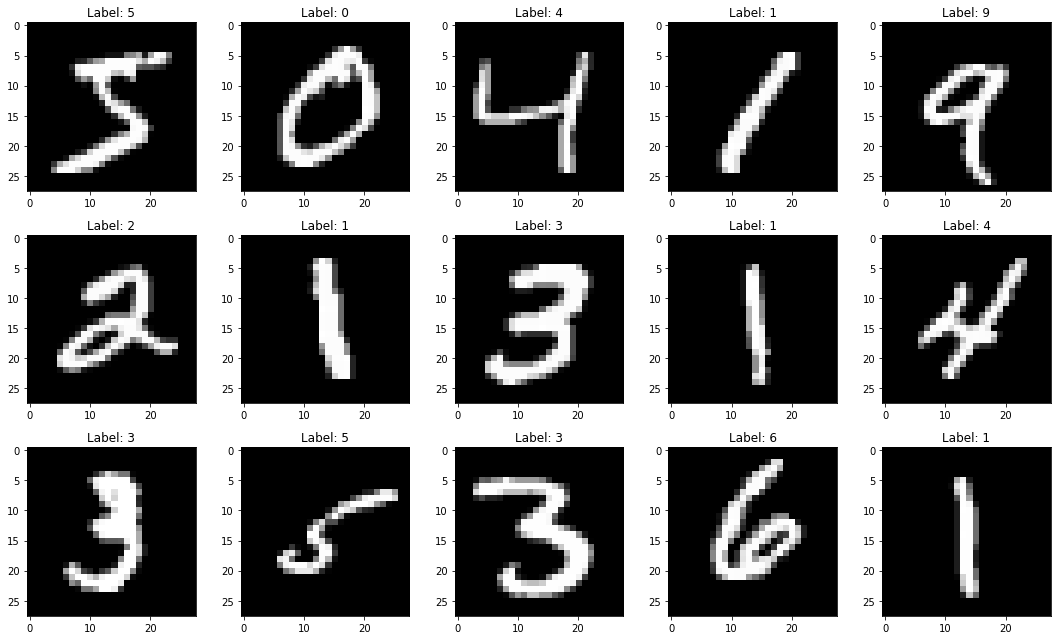

In [9]:
num_row, num_col = 3, 5

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.savefig('mnist_orignin-examples.png')
plt.show()

Inverting images

In [10]:
train_images = np.invert(train_images)
test_images = np.invert(test_images)

Showing a few examples and their labels from train_images after inverting

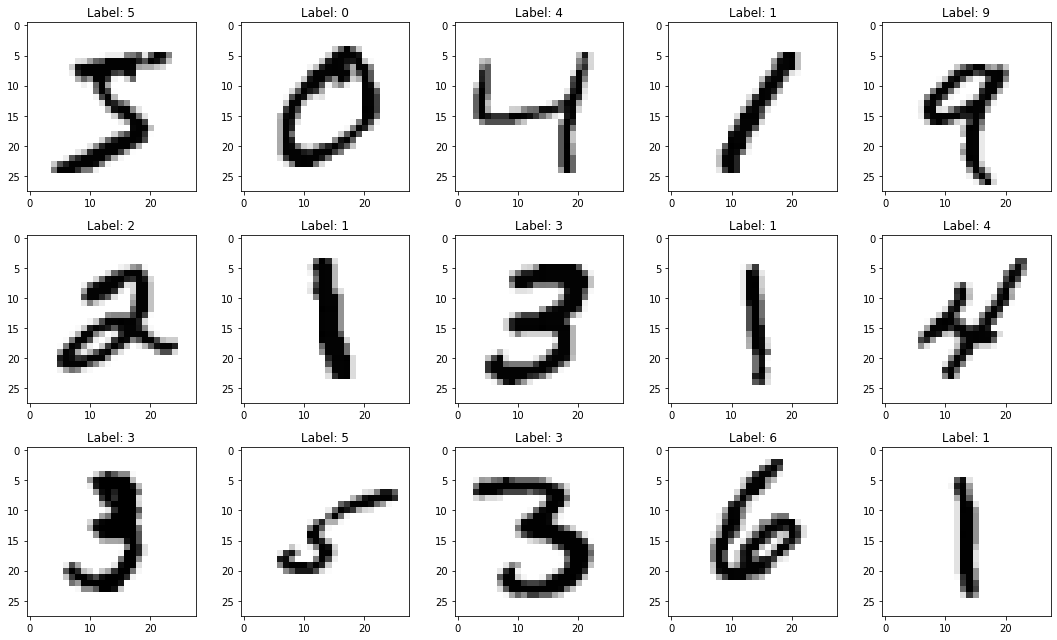

In [11]:
num_row, num_col = 3, 5

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.savefig('mnist_examples.png')
plt.show()


Using the data augmentation 

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ]
)

Building the network architecture

In [13]:
model = keras.Sequential([layers.Dense(512, activation="relu"),
                          layers.Dense(10, activation="softmax")
])

Model compilation

In [14]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Preparing the image data (reshaping and normalization)

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [16]:
train_images.shape

(60000, 784)

“Fitting” the model

In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="FCC_MNIST-w_back.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks)

Epoch 1/50
422/422 [==============================] - 5s 3ms/step - loss: 0.6003 - accuracy: 0.8257 - val_loss: 0.3199 - val_accuracy: 0.9087
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8943 - val_loss: 0.2740 - val_accuracy: 0.9157
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.2937 - accuracy: 0.9137 - val_loss: 0.2239 - val_accuracy: 0.9398
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.9278 - val_loss: 0.1942 - val_accuracy: 0.9460
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.2028 - accuracy: 0.9390 - val_loss: 0.1588 - val_accuracy: 0.9560
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.9471 - val_loss: 0.1279 - val_accuracy: 0.9668
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 0.1577 - accuracy: 0.9532 - val_loss: 0.1164 - val_accuracy: 0.9692
Epoch 

Plotting the history data of training the model

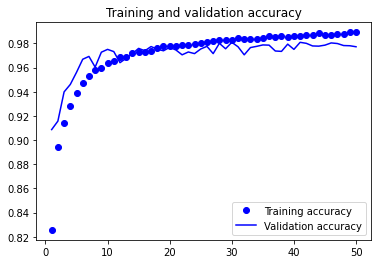

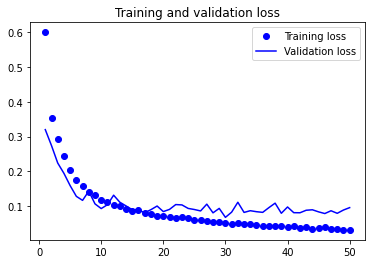

In [18]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.savefig('mnist_FCN-trainig-history-accuracy.png')
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.savefig('mnist_FCN-trainig-history-loss.png')
plt.show()

Computing average accuracy over the entire test set

In [19]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9734
Test accuracy: 97.34%


## Convnet

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images = np.invert(train_images)
test_images = np.invert(test_images)

In [22]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.3, width_factor=0.3
        ),
    ]
)

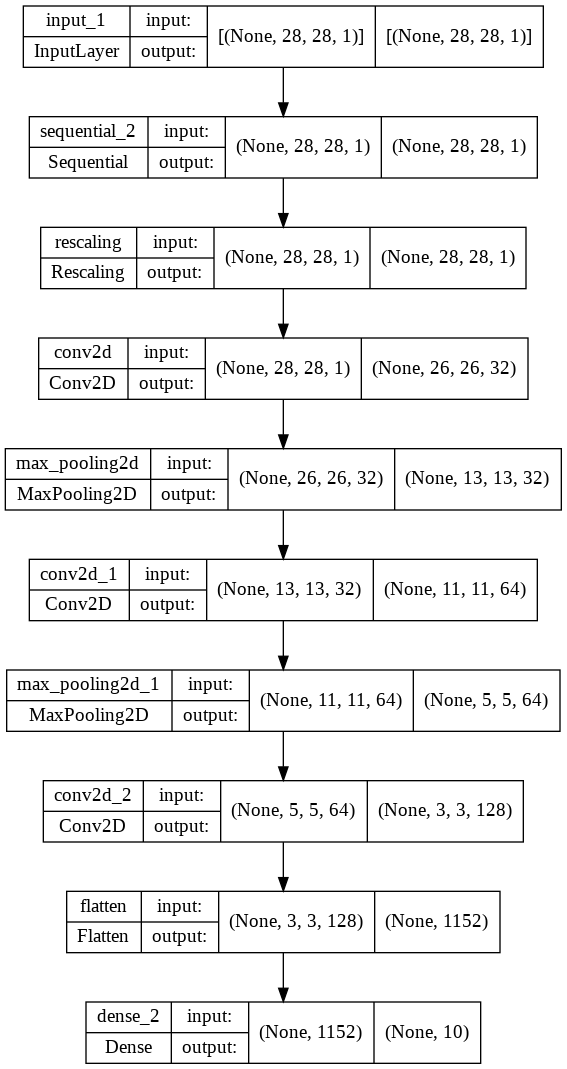

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
plot_model(model, to_file='CNN_architecture.png', show_shapes=True, show_layer_names=True)

In [24]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="CNN_MNIST-w_back.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks)

Epoch 1/50
422/422 [==============================] - 14s 8ms/step - loss: 0.6306 - accuracy: 0.7958 - val_loss: 0.1625 - val_accuracy: 0.9462
Epoch 2/50
422/422 [==============================] - 3s 8ms/step - loss: 0.2224 - accuracy: 0.9297 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 3/50
422/422 [==============================] - 3s 7ms/step - loss: 0.1394 - accuracy: 0.9564 - val_loss: 0.0710 - val_accuracy: 0.9792
Epoch 4/50
422/422 [==============================] - 3s 7ms/step - loss: 0.1115 - accuracy: 0.9645 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0943 - accuracy: 0.9704 - val_loss: 0.0529 - val_accuracy: 0.9853
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0648 - val_accuracy: 0.9817
Epoch 7/50
422/422 [==============================] - 3s 7ms/step - loss: 0.0766 - accuracy: 0.9756 - val_loss: 0.0510 - val_accuracy: 0.9870
Epoch

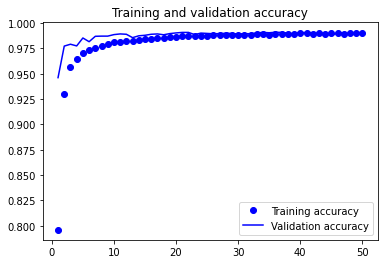

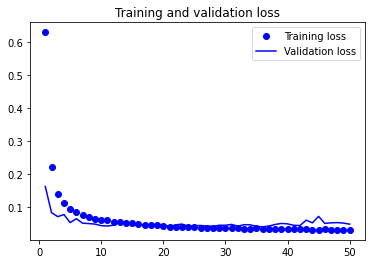

In [26]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.savefig('mnist_CNN-trainig-history-accuracy.png')
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.savefig('mnist_CNN-trainig-history-loss.png')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9898
Test accuracy: 0.990
